In [ ]:
from google.colab import files
uploaded = files.upload()

Saving turing.jpg to turing.jpg


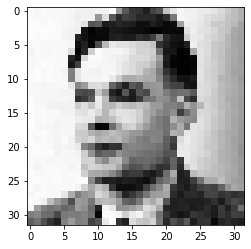

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_DIMS = 32

image = cv2.imread('turing.jpg')  
image = cv2.resize(image, (IMG_DIMS, IMG_DIMS))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

In [ ]:
gray_image

array([[236, 233, 236, ..., 196, 185, 174],
       [235, 235, 234, ..., 189, 186, 175],
       [237, 236, 235, ..., 188, 182, 164],
       ...,
       [231, 159, 133, ...,  56,  77, 122],
       [132, 139, 119, ...,  66,  82,  81],
       [106, 123,  94, ...,  66,  59,  53]], dtype=uint8)

In [ ]:
import random

POPULATION_SIZE = 200

def create_genome(dim=IMG_DIMS):
  return (255.0* np.random.rand(dim)).astype(np.uint8)

def calc_fitness(genome, target):
  fitness = 0
  for g, t in zip(genome, target):
    if g != t:
      fitness += 1
  return fitness
			

def mate(parent1, parent2, target):
  """
  select from p1 if probablity is less than 0.45, selected from p2 if less than 0.9
  mutate the gene otherwise
  """
  child_chromosome = []
  p1_chroms = parent1[1]
  p2_chroms = parent2[1]
  for p1, p2 in zip(p1_chroms, p2_chroms):
    prob = random.random()
    if prob < 0.45:
      child_chromosome.append(p1)
    elif prob < 0.9:
      child_chromosome.append(p1)
    else:
      child_chromosome.append(random.randint(1, 256))
  score = calc_fitness(child_chromosome, target)
  return (score, child_chromosome)


def run_genetic(target, threshold=10000):
  """
  threshold parameter specifies how many epochs do we wait 
  to declare convergence if fitness doesn't change
  """
  generation = 1
  found = False
  population = []
  ######## create initial population #########
  for _ in range(POPULATION_SIZE):
    genome = create_genome()
    score = calc_fitness(genome, target)
    population.append((score, genome))

  convergence_counter = 0
  prev_fitness = 100
  while not found:
    population = sorted(population, key = lambda x:x[0]) ### index 0 of type is fitness score
    
    
    if prev_fitness == population[0][0]:
      convergence_counter += 1
    else:
      convergence_counter = 0

    if (population[0][0] <= 0) or (convergence_counter >= threshold):
      found = True
      print('Converged!')
      return population[0][1]
    
    ratio = 10
    new_generation = []
    s = int((ratio*POPULATION_SIZE)/100)
    new_generation.extend(population[:s])

    s = int(((100-ratio)*POPULATION_SIZE)/100)
    count = int(POPULATION_SIZE//2)
    for _ in range(s):
      parent1 = random.choice(population[:count])
      parent2 = random.choice(population[:count])
      child = mate(parent1, parent2, target)
      new_generation.append(child)

    population = new_generation
    print(f"Generation: {generation}\tFitness: {population[0][0]}")
    generation += 1
    prev_fitness = population[0][0]


    

def reconstruct_image(image):
  reconstructed_image = []
  for i in range(0, IMG_DIMS):
    print(f"row {i}:")
    output = run_genetic(gray_image[i]) 
    reconstructed_image.append(output)
  return np.array(reconstructed_image)

In [ ]:
output_image = reconstruct_image(gray_image)

Streaming output truncated to the last 5000 lines.
Generation: 736	Fitness: 7
Generation: 737	Fitness: 7
Generation: 738	Fitness: 7
Generation: 739	Fitness: 7
Generation: 740	Fitness: 7
Generation: 741	Fitness: 7
Generation: 742	Fitness: 7
Generation: 743	Fitness: 7
Generation: 744	Fitness: 7
Generation: 745	Fitness: 7
Generation: 746	Fitness: 7
Generation: 747	Fitness: 7
Generation: 748	Fitness: 7
Generation: 749	Fitness: 7
Generation: 750	Fitness: 7
Generation: 751	Fitness: 7
Generation: 752	Fitness: 7
Generation: 753	Fitness: 7
Generation: 754	Fitness: 7
Generation: 755	Fitness: 7
Generation: 756	Fitness: 7
Generation: 757	Fitness: 7
Generation: 758	Fitness: 7
Generation: 759	Fitness: 7
Generation: 760	Fitness: 7
Generation: 761	Fitness: 7
Generation: 762	Fitness: 7
Generation: 763	Fitness: 7
Generation: 764	Fitness: 7
Generation: 765	Fitness: 7
Generation: 766	Fitness: 7
Generation: 767	Fitness: 7
Generation: 768	Fitness: 7
Generation: 769	Fitness: 7
Generation: 770	Fitness: 7
Gene

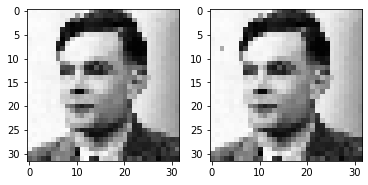

In [ ]:
img = output_image.astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")